In [1]:
import os

In [2]:
!curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  30.4M      0 --:--:-- --:--:-- --:--:-- 30.4M


In [3]:
!curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28881  100 28881    0     0   553k      0 --:--:-- --:--:-- --:--:--  553k


In [4]:
!curl -O http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1610k  100 1610k    0     0  9818k      0 --:--:-- --:--:-- --:--:-- 9818k


In [5]:
!curl -O http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4542  100  4542    0     0  22048      0 --:--:-- --:--:-- --:--:-- 22048


In [6]:
!gunzip *.gz

In [7]:
from mlxtend.data import loadlocal_mnist
import platform

In [8]:
X, y = loadlocal_mnist(
            images_path='train-images-idx3-ubyte', 
            labels_path='train-labels-idx1-ubyte')

In [9]:
import numpy as np

print('Digits:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(y))
print('Class distribution: %s' % np.bincount(y))

Digits:  0 1 2 3 4 5 6 7 8 9
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [10]:
!pip install conx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 KB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 KB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=b7a4828770d6bbe6296dc1dfe9e8f2bf554cf715ac57d0de05c806c997592259
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
  Created wheel for cairocffi: filename=cairocffi-1.4.0-py3-none-any.whl size=88775 sha256=311ed932ca6402cde8e494fe5967abc3787b36e01e396ecfb316b519f5c1dfdf
 

In [11]:
print(X[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

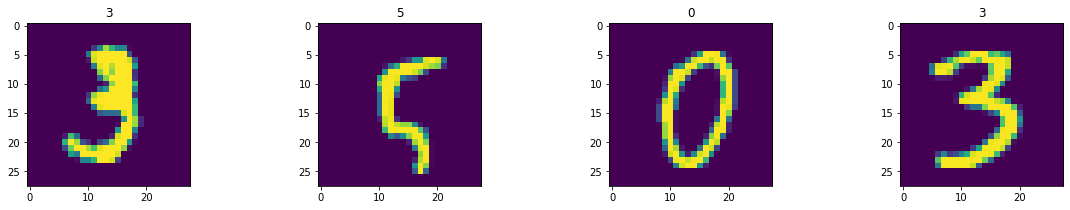

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
patterns = [10, 100, 1000, 10000]
fig, axs = plt.subplots(1, len(patterns))
for i in range(len(patterns)):
  axs[i].set_title(y[patterns[i]])
  axs[i].imshow(np.array(X[patterns[i]]).reshape((28, 28)))


In [13]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [14]:
from sklearn.preprocessing import normalize

In [15]:
class NumberDataset(Dataset):
    def __init__(self, image_file, label_file, transform=None):
        self.images, self.labels =loadlocal_mnist(
            images_path=image_file, 
            labels_path=label_file) 

        self.transform = transform
    def __len__(self):
        return len(self.images)
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        m = np.reshape(np.array(self.images[idx]), (28, 28))
        mx = m.max()
        mn = m.min()
        m = (m - mn)/(mx - mn)
        m = m.astype("float")
        sample = (m, self.labels[idx])
        if self.transform:
            sample = self.transform(sample)
        return sample

In [16]:
from scipy import ndimage
import cv2

In [17]:
class RandomMove(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, move_delta):
        self.move_delta = move_delta
        self.not_zero_value = 0.1
    def image_left_border(self, image):
      h, w = image.shape[:2]
      for j in range(w):
        for i in range(h):
          if image[i, j] >= self.not_zero_value:
            return j
      return w
    def image_right_border(self, image):
      h, w = image.shape[:2]
      for j in range(w-1,-1,-1):
        for i in range(h):
          if image[i, j] >=self.not_zero_value:
            return w-j-1
      return w
    def image_up_border(self, image):
      h, w = image.shape[:2]
      for i in range(h):
        for j in range(w):
         if image[i, j] >= self.not_zero_value:
           return i
      return h
    def image_down_border(self, image):
      h, w = image.shape[:2]
      for i in range(h-1,-1,-1):
        for j in range(w):
         if image[i, j] >= self.not_zero_value:
           return h-1-i
      return h
    def __call__(self, sample):
        image, label = sample[0], sample[1]
        h, w = image.shape[:2]
        x_move = np.random.randint(-min(self.image_up_border(image), self.move_delta), min(self.image_down_border(image),self.move_delta) + 1)
        y_move = np.random.randint(-min(self.image_left_border(image), self.move_delta), min(self.image_right_border(image),self.move_delta) + 1)
        new_image = np.zeros((h, w))
        for x in range(h):
          for y in range(w):
            if 0 <= x - x_move < h and 0 <= y - y_move < w:
              new_image[x, y] = image[x - x_move, y - y_move]
        return new_image, label
class RandomConstrast(object):
  def __init__(self, contrast_koef):
    self.contrast_koef = contrast_koef
  def __call__(self, sample):
    image, label = sample[0], sample[1]
    h, w = image.shape[:2]
    contrast_change = 1.0 + (np.random.rand() * (-self.contrast_koef[0] + self.contrast_koef[1]) + self.contrast_koef[0])
    for x in range(h):
      for y in range(w):
        image[x, y] = min(1.0, image[x, y] * contrast_change)
    return image, label
class RandomZoom(object):
  def __init__(self, zoom_koef):
    self.zoom_koef = zoom_koef
  def paddedzoom2(self, img, zoomfactor=0.8):
    h,w = img.shape
    M = cv2.getRotationMatrix2D( (w/2,h/2), 0, zoomfactor) 
    
    return cv2.warpAffine(img, M, img.shape[::-1])
  def __call__(self, sample):
    image, label = sample[0], sample[1]
    h, w = image.shape[:2]
    zoom_change = 1.0 + (np.random.rand() * (-self.zoom_koef[0] + self.zoom_koef[1]) + self.zoom_koef[0])
    return self.paddedzoom2(image, zoom_change), label
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, label = sample[0], sample[1]
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.reshape((1, 28, 28))
        image = image.astype("float")
        return  torch.Tensor(image), label

In [18]:
move = RandomMove(20)

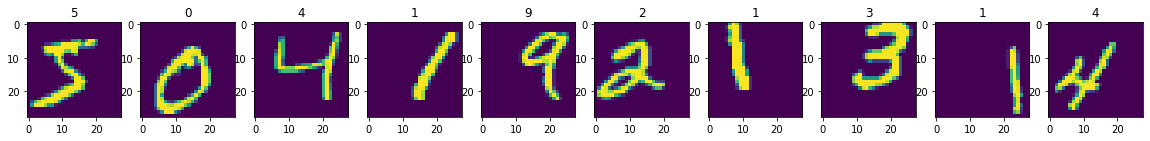

In [19]:
dataset = NumberDataset("train-images-idx3-ubyte", "train-labels-idx1-ubyte")

patterns = [i for i in range(10)]
fig, axs = plt.subplots(1, len(patterns))
for i, idx in enumerate(patterns):
  sample = dataset[idx]
  axs[i].imshow(move(sample)[0])
  axs[i].set_title(sample[1])

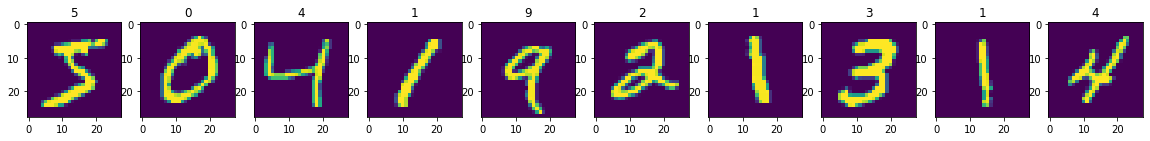

In [20]:
contrast = RandomConstrast((-0.1,0.1))

patterns = [i for i in range(10)]
fig, axs = plt.subplots(1, len(patterns))
for i, idx in enumerate(patterns):
  sample = dataset[idx]
  axs[i].imshow(contrast(sample)[0])
  axs[i].set_title(sample[1])

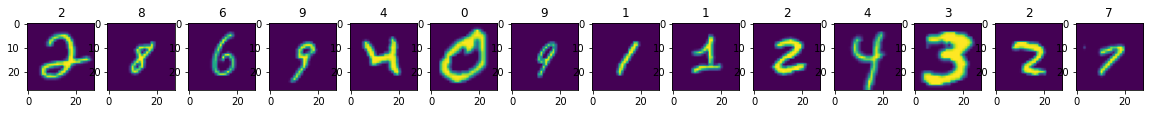

In [21]:
zoom = RandomZoom((-0.4,0.4))

patterns = [i for i in range(16,30)]
fig, axs = plt.subplots(1, len(patterns))
for i, idx in enumerate(patterns):
  sample = dataset[idx]
  axs[i].imshow(zoom(sample)[0])
  axs[i].set_title(sample[1])

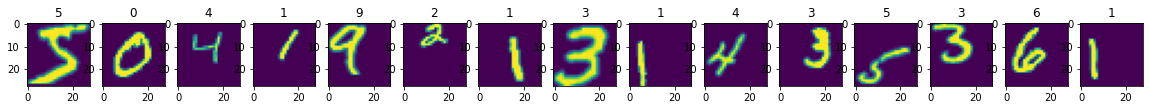

In [22]:
transform=transforms.Compose([
                                                RandomZoom((-0.4,0.4)),
                                               RandomMove(20),
                                               RandomConstrast((-0.1, 0.7))
                                              #  ToTensor()
                                           ])
patterns = [i for i in range(15)]
fig, axs = plt.subplots(1, len(patterns))
for i, idx in enumerate(patterns):
  sample = dataset[idx]
  axs[i].imshow(transform(sample)[0])
  axs[i].set_title(sample[1])

transform=transforms.Compose([
                                                RandomZoom((-0.4,0.4)),
                                               RandomMove(20),
                                               RandomConstrast((-0.1, 0.7)),
                                              ToTensor()
                                           ])

In [23]:
transformed_dataset = NumberDataset("train-images-idx3-ubyte", "train-labels-idx1-ubyte", transform=transform)

In [24]:
train_loader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=0)
test_loader = DataLoader(NumberDataset("t10k-images-idx3-ubyte", "t10k-labels-idx1-ubyte", transform=transform), batch_size=4, shuffle= True, num_workers= 0)

In [25]:
for i_batch, sample_batched in enumerate(train_loader):
    print(i_batch, sample_batched[0].size(),
          sample_batched[1].size())
    print(sample_batched[0][0])
    if i_batch == 3:
      break

0 torch.Size([4, 1, 28, 28]) torch.Size([4])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.

In [26]:
print(transformed_dataset[0])


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [27]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F

In [28]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(3)
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=5, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(12)
        self.pool = nn.MaxPool2d(2,2)
        self.conv4 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=5, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(24)
        self.conv5 = nn.Conv2d(in_channels=24, out_channels=24, kernel_size=5, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(24)
        self.fc1 = nn.Linear(24*8*8, 10)

    def forward(self, input):
        output = F.relu(self.bn1(self.conv1(input)))      
        output = F.relu(self.bn2(self.conv2(output)))     
        output = self.pool(output)                        
        output = F.relu(self.bn4(self.conv4(output)))     
        output = F.relu(self.bn5(self.conv5(output)))     
        output = output.view(-1, 24*8*8)
        output = self.fc1(output)

        return output

In [29]:
model = Network()

In [30]:
from torch.optim import Adam
 
# Define the loss function with Classification Cross-Entropy loss and an optimizer with Adam optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

In [31]:
from torch.autograd import Variable

# Function to save the model
def saveModel():
    path = "./myFirstModel.pth"
    torch.save(model.state_dict(), path)

In [36]:
def testAccuracy():
    
    model.eval()
    accuracy = 0.0
    total = 0.0
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images = Variable(images.to(device))
            labels = Variable(labels.to(device))
            # run the model on the test set to predict labels
            outputs = model(images)
            # the label with the highest energy will be our prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()
    
    # compute the accuracy over all test images
    accuracy = (100 * accuracy / total)
    return(accuracy)


In [37]:
def train(num_epochs):
    
    best_accuracy = 0.0

    # Define your execution device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("The model will be running on", device, "device")
    # Convert model parameters and buffers to CPU or Cuda
    model.to(device)

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        running_acc = 0.0

        for i, (images, labels) in enumerate(train_loader, 0):
            
            # get the inputs
            images = Variable(images.to(device))
            labels = Variable(labels.to(device))

            # zero the parameter gradients
            optimizer.zero_grad()
            # predict classes using images from the training set
            outputs = model(images)
            # compute the loss based on model output and real labels
            loss = loss_fn(outputs, labels)
            # backpropagate the loss
            loss.backward()
            # adjust parameters based on the calculated gradients
            optimizer.step()

            # Let's print statistics for every 1,000 images
            running_loss += loss.item()     # extract the loss value
            if i % 1000 == 999:    
                # print every 1000 (twice per epoch) 
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 1000))
                # zero the loss
                running_loss = 0.0

        # Compute and print the average accuracy fo this epoch when tested over all 10000 test images
        accuracy = testAccuracy()
        print('For epoch', epoch+1,'the test accuracy over the whole test set is %d %%' % (accuracy))
        
        # we want to save the model if the accuracy is the best
        if accuracy > best_accuracy:
            saveModel()
            best_accuracy = accuracy

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show the images
def imageshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Function to test the model with a batch of images and show the labels predictions
def testBatch():
    # get batch of images from the test DataLoader  
    images, labels = next(iter(test_loader))
    # show all images as one image grid
    imageshow(torchvision.utils.make_grid(images))
   
    # Show the real labels on the screen 
    print('Real labels: ', ' '.join('%5s' % labels[j]
                               for j in range(4)))
  
    # Let's see what if the model identifiers the  labels of those example
    outputs = model(images)
    
    # We got the probability for every 10 labels. The highest (max) probability should be correct label
    _, predicted = torch.max(outputs, 1)
    
    # Let's show the predicted labels on the screen to compare with the real ones
    print('Predicted: ', ' '.join('%5s' % predicted[j] 
                              for j in range(4)))

In [39]:
  # Let's build our model
  train(5)
  print('Finished Training')

The model will be running on cuda:0 device
[1,  1000] loss: 0.221
[1,  2000] loss: 0.181
[1,  3000] loss: 0.195
[1,  4000] loss: 0.157
[1,  5000] loss: 0.147
[1,  6000] loss: 0.174
[1,  7000] loss: 0.145
[1,  8000] loss: 0.133
[1,  9000] loss: 0.152
[1, 10000] loss: 0.130
[1, 11000] loss: 0.152
[1, 12000] loss: 0.132
[1, 13000] loss: 0.125
[1, 14000] loss: 0.135
[1, 15000] loss: 0.135
For epoch 1 the test accuracy over the whole test set is 96 %
[2,  1000] loss: 0.130
[2,  2000] loss: 0.143
[2,  3000] loss: 0.118
[2,  4000] loss: 0.117
[2,  5000] loss: 0.124
[2,  6000] loss: 0.126
[2,  7000] loss: 0.114
[2,  8000] loss: 0.124
[2,  9000] loss: 0.113
[2, 10000] loss: 0.113
[2, 11000] loss: 0.118
[2, 12000] loss: 0.110
[2, 13000] loss: 0.121
[2, 14000] loss: 0.111
[2, 15000] loss: 0.098
For epoch 2 the test accuracy over the whole test set is 96 %
[3,  1000] loss: 0.100
[3,  2000] loss: 0.087
[3,  3000] loss: 0.102
[3,  4000] loss: 0.088
[3,  5000] loss: 0.120
[3,  6000] loss: 0.104
[3,  

In [40]:
  # Test which classes performed well
  testAccuracy()



97.6

In [51]:
  # Let's load the model we just created and test the accuracy per label
  model = Network()
  path = "myFirstModel.pth"
  model.load_state_dict(torch.load(path))

<All keys matched successfully>

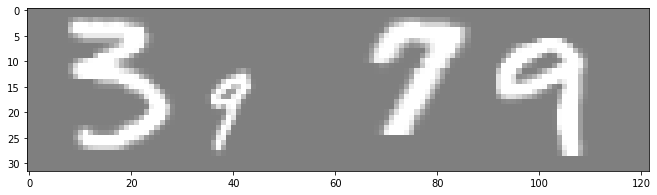

Real labels:  tensor(3, dtype=torch.uint8) tensor(9, dtype=torch.uint8) tensor(7, dtype=torch.uint8) tensor(9, dtype=torch.uint8)
Predicted:  tensor(3) tensor(4) tensor(1) tensor(9)


In [59]:
  # Test with batch of images
  testBatch()